In [73]:
import numpy as np
import matplotlib.pyplot as plt  # 绘图库
import scipy.optimize as op

In [74]:
## ======================= Part 2: Plotting =======================
data = np.loadtxt('ex1data1.txt')
m = data.shape[0]
X = np.c_[np.ones([m, 1]), data[:, 0]]    # Add a column of ones to x
y = data[:, 1]
y = np.reshape(y, (-1, 1))

In [75]:
def computeCost(theta, X, y):

    
    m, n = X.shape # number of training examples
    theta = np.reshape(theta, (2,1))
    
    delta = np.dot(X, theta) - np.reshape(y, (m, 1))    
    J = np.sum(np.square(delta)) / (2*m)


    return J

In [76]:
def computeGradient(theta, X, y):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.reshape(theta, (2,1))
    
    hypothesis = np.dot(X, theta)
    grad = np.dot(X.T, hypothesis - y) / m
    
    return grad.flatten()

Testing the cost function ...
With theta = [0 ; 0]
Cost computed =  32.072733877455676
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24
Theta found by optimize minimize:
[[0.]
 [0.]]
Expected theta values (approx)
 -3.6303
  1.1664




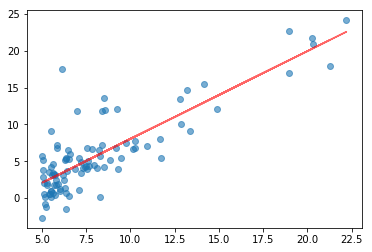

For population = 35,000, we predict a profit of 
 2798.3703605022424
For population = 70,000, we predict a profit of 
 44554.54718116604


In [77]:
## =================== Part 3: Cost and Gradient descent ===================
theta = np.zeros([2, 1])    # initialize fitting parameters


print("Testing the cost function ...")
# compute and display initial cost
J = computeCost(theta, X, y)
print("With theta = [0 ; 0]\nCost computed = ", J)
print("Expected cost value (approx) 32.07")


# further testing of the cost function
J = computeCost([[-1], [2]], X, y)
print("With theta = [-1 ; 2]\nCost computed = ", J)
print("Expected cost value (approx) 54.24")

# print theta to screen
print("Theta found by optimize minimize:")
print(theta)
print("Expected theta values (approx)")
print(" -3.6303\n  1.1664\n\n")

Result = op.minimize(fun = computeCost, 
                                 x0 = theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = computeGradient)
theta = Result.x

# Plot the linear fit
plt.scatter(X[:, 1], y, alpha=0.6)  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.plot(X[:, 1], np.dot(X, theta), color='r', alpha=0.6)  # connect dots with line
plt.show()


# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print("For population = 35,000, we predict a profit of \n",
    predict1*10000);
predict2 = np.dot([1, 7], theta)
print("For population = 70,000, we predict a profit of \n",
    predict2*10000);
